In [11]:
import pandas as pd
from googlesearch import search
import Comp_classify_def as alldef
from bs4 import BeautifulSoup
import enchant
import wordninja
import requests
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv('testdata_Labeled.csv')
data.drop(data.index[0],axis =0,inplace=True)

In [13]:
data = data.head(73)

In [23]:
data.drop(data.columns[3],axis =1,inplace=True)

In [30]:
data = data.head(73)

In [31]:
X = data.housing_flg
Y = data.Category

In [32]:
for i in range(1,len(Y)+1):
    if (Y[i]!='Bank' and Y[i]!='other'):
        Y[i]= 'other'

In [33]:
X_df = alldef.transform_data(X)

In [34]:
def link_obtain(X_df):
    for i,j in X_df.iterrows():
        URL = X_df['housing_flg'][i]
        query = URL
        print(query)
        #Directly Retrieving all ifsc code data without saving link in column.
        if(len(str(query.strip())))<5:
            t =0
            str_list = list('https://www.ifsccodebank.com/search-by-IFSC-code.aspx?IFSCCode=')
            str_list.append(query)
            url = ''.join(str_list)
            response = requests.get(''.join(str_list))
            soup = BeautifulSoup(response.text,'html.parser')
            t = soup.get_text()
            r = t[t.find(query)+7:]
            r = (r[:r.find('-')-5].strip())
            X_df['Company'][i] = r
            q2 = str(X_df['Company'][i])+' wiki'
            print(q2)
            if 'com' not in q2:
                t =0
                for l in search(q2,stop = 2):
                    stri = 'Link'+str(t)
                    print(q2,l)
                    X_df[stri][i] = l
                    t = int(t)+1
                    print(stri)
            else:
                X_df['Company'][i] = 'Nan'
            continue
        #if Name has no space ---> Using wordninja algo to split the words.
        elif ' ' not in query.strip():
            query = " ".join(str(x) for x in wordninja.split(query))+' Wiki'
    ####===> The following gets the link and not the data <===####    
        # Direct search for appropriate official Link    
        try:
            t = 0
            for k in search(query,stop = 2):
                stri = 'Link' + str(t)
                X_df[stri][i] = k
                t = t+1
                print(stri)
        # Search the words with key word Financial Services
            t = 2
            query = URL + ' Finanancial Services' + ' Wiki'
            for k in search(query,stop = 2):
                stri = 'Link' + str(t)
                X_df[stri][i] = k 
                t = t+1
                print(stri)
        except Exception as e:
            print(e)
            # except block to store the company which has bad request/other issue
            X_df['Link4'][i] = query
            print('Errored out: ',query)
    return X_df

In [36]:
X_df = link_obtain(X_df)

AADHAR HOUSING FINAN
Link0
Link1
Link2
Link3
AAMAADMIPARTY
Link0
Link1
Link2
Link3
Aavas Financiers Lim
Link0
Link1
Link2
Link3
ABHIPRA CAPITAL LTD
Link0
Link1
Link2
Link3
ANDB 
andhra bank wiki
andhra bank wiki https://en.wikipedia.org/wiki/Andhra_Bank
Link0
andhra bank wiki https://en.wikipedia.org/wiki/Andhra_Bank#History
Link1
BARB 
bank of baroda wiki
bank of baroda wiki https://en.wikipedia.org/wiki/Bank_of_Baroda
Link0
bank of baroda wiki https://en.wikipedia.org/wiki/Bank_of_India
Link1
BKID 
bank of india wiki
bank of india wiki https://en.wikipedia.org/wiki/Bank_of_India
Link0
bank of india wiki https://en.wikipedia.org/wiki/Central_Bank_of_India
Link1
CITI 
citibank wiki
citibank wiki https://en.wikipedia.org/wiki/Citibank
Link0
citibank wiki https://en.wikipedia.org/wiki/Citibank_India
Link1
CNRB 
canara bank wiki
canara bank wiki https://en.wikipedia.org/wiki/Canara_Bank
Link0
canara bank wiki https://en.wikipedia.org/wiki/Canara_Bank#History
Link1
CORP 
ifsccodebank.com



In [37]:
def cleanme(html):
    soup = BeautifulSoup(html) # create a new bs4 object from the html data loaded
    for script in soup(["script"]): 
        script.extract()
    text = soup.get_text()
    text = text.replace('\n', ' ').replace('\r', '').replace('\t',' ')
    d = enchant.Dict("en_US") #To remove html link / tags
    eng_words = list()
    for word in text.split():
        if d.check(word):
            eng_words.append(word)
    print (eng_words)
    return eng_words
    
def lmtd_data_desc(X_df):
    for i,j in X_df.iterrows():
        if 'Nan' not in X_df['Link0'][i]:
            response = requests.get(X_df['Link0'][i],verify = False)
            t = cleanme(response.text)
            X_df['Data0'][i] = t
    return X_df

In [38]:
X1 = lmtd_data_desc(X_df)

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Housing', 'Finance', 'Home', 'Loan', '|', 'House', 'Loan', '|', 'Housing', 'Loan', 'Finance', 'Company', 'in', 'India', 'Language', '/', 'About', 'Us', 'Overview', 'Vision', 'Mission', '&', 'values', 'Management', 'Awards', '&', 'Recognition', 'Customer', 'Promise', 'Regulatory', 'Approvals', 'Downloads', 'Branch', 'Locator', 'Language', '/', 'Loans', 'Home', 'Loan', 'for', 'Salaried', 'Employees', 'Home', 'Loan', 'for', 'Self', 'Employed', 'Loan', 'for', 'Plot', 'Purchase', 'Construction', 'Home', 'Improvement', 'Loan', 'Home', 'Extension', 'Loan', 'Loan', 'against', 'Property', 'Balance', 'Transfer', 'and', 'Top', 'up', 'Loan', 'for', 'of', 'Property', 'About', 'Us', 'Overview', 'Vision', 'Mission', '&', 'values', 'Management', 'Awards', '&', 'Recognition', 'Customer', 'Promise', 'Regulatory', 'Approvals', 'Ready', 'Home', 'Loan', 'Approval', 'Process', 'Documents', 'Needed', 'Services', '&', 'Charges', 'Eligibility', 'Calculator', 'Calculator', 'Customer', 'Relations', 'Unauthoriz

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Party', '-', 'Wikipedia', 'Party', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'For', 'the', 'Pakistani', 'political', 'party', 'bearing', 'a', 'similar', 'see', 'Party', 'This', 'article', 'needs', 'to', 'be', 'Please', 'update', 'this', 'article', 'to', 'reflect', 'recent', 'events', 'or', 'newly', 'available', '&', 'others', '&', 'November', 'years', 'Rouse', 'New', 'Party', 'Youth', 'to', 'in', 'in', '/', 'in', '/', 'in', 'Delhi', 'Legislative', '/', 'in', 'Punjab', 'Legislative', '/', 'of', 'states', 'and', 'union', 'territories', 'in', '/', 'of', 'Party', 'Common', "Man's", 'is', 'an', 'Indian', 'political', 'formally', 'launched', 'on', 'November', 'and', 'is', 'currently', 'the', 'ruling', 'party', 'of', 'the', 'National', 'Capital', 'Territory', 'of', 'It', 'came', 'into', 'existence', 'following', 'differences', 'between', 'the', 'activists', 'and', 'Anna', 'regarding', 'whether', 'or', 'not', 'to', 'the', 'popular', 'India', '

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['About', 'Us', '-', 'Housing', 'Financiers', '|', 'Financiers', 'Financiers', 'Limited', '-', 'Home', 'Home', 'Loan', 'Finance', 'Company', 'in', 'India', '{', '}', '{', '}', '{', '}', '}', '}', '{', 'inline', 'none', 'none', '0', 'none', '0', '}', '{', '0', '0', '}', '{', '}', 'To', 'Toggle', 'navigation', 'Home', 'About', 'Us', 'Overview', 'Vision', 'and', 'Mission', 'Board', 'of', 'Directors', 'Our', 'Leadership', 'Our', 'Promoters', 'awards', 'and', 'accolades', 'Media', 'Products', 'Overview', 'Home', 'Loan', 'Land', 'Purchase', 'Construction', 'Home', 'Improvement', 'Loan', 'Balance', 'Transfer', 'Home', 'Equity', 'Small', '&', 'Medium', 'Enterprise', 'Loan', 'Rate', 'Resources', 'Information', 'Booklet', 'Schedule', 'Of', 'Charges', 'Grievance', 'Policy', 'and', 'Policy', 'List', 'of', 'Creditors', 'Fair', 'Practices', 'Code', 'FAQs', 'Investor', 'relations', 'Corporate', 'Governance', 'Policies', 'Policy', 'VIGIL', 'MECHANISM', 'POLICY', 'POLICY', 'ON', 'TRANSACTIONS', 'WITH',

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['{', '0', '-', 'One', 'stop', 'Financial', 'Hub', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', ';', '}', '{', '}', '{', '}', '{', '}', '{', '}', '{', '{', ';', '}', '}', 'we', 'Market', 'Pension', 'for', 'Account', 'training', '&', 'Education', 'Bill', 'and', 'Bill', 'fund', 'Insurance', 'Services', 'To', 'Issuer', 'Claim', 'Gold', 'Solutions', 'Fixed', 'Asset', 'Management', 'Document', 'Management', 'APP', 'Email', ':', 'This', 'email', 'address', 'is', 'being', 'protected', 'from', 'You', 'need', 'JavaScript', 'enabled', 'to', 'view', 'Phone', ':', 'we', 'Market', 'Pension', 'for', 'Account', 'training', '&', 'Education', 'Bill', 'and', 'Bill', 'fund', 'Insurance', 'Services', 'To', 'Issuer', 'Claim', 'Gold', 'Solutions', 'Fixed', 'Asset', 'Management', 'Document', 'Management', 'Services', 'We', 'Offer', 'Financial', 'Markets', 'Complete', 'Financial', 'Market', 'Services'

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'has', 'multiple', 'Please', 'help', 'improve', 'it', 'or', 'discuss', 'these', 'issues', 'on', 'the', 'talk', 'how', 'and', 'when', 'to', 'remove', 'these', 'template', 'This', 'article', 'contains', 'wording', 'that', 'promotes', 'the', 'subject', 'in', 'a', 'subjective', 'manner', 'without', 'imparting', 'real', 'Please', 'remove', 'or', 'replace', 'such', 'wording', 'and', 'instead', 'of', 'making', 'proclamations', 'about', 'a', "subject's", 'use', 'facts', 'and', 'attribution', 'to', 'demonstrate', 'that', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'a

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', 'of', 'Baroda', '-', 'Wikipedia', 'Bank', 'of', 'Baroda', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Bank', 'of', 'International', 'sector', 'Nifty', 'July', 'years', 'ago', 'of', '&', '&', 'corporate', 'finance', 'and', 'investment', 'mortgage', 'private', 'private', 'asset', 'wealth', 'income', 'income', 'assets', 'equity', 'of', 'of', 'Bank', 'of', 'Baroda', 'is', 'an', 'Indian', 'public', 'sector', 'banking', 'and', 'financial', 'services', 'It', 'is', 'owned', 'by', 'Government', 'of', 'Based', 'on', 'it', 'is', 'ranked', 'on', 'Forbes', 'Global', 'has', 'total', 'assets', 'in', 'excess', 'of', '₹', 'trillion', 'it', 'India’s', 'biggest', 'bank', 'by', 'a', 'network', 'of', 'branches', 'in', 'India', 'and', 'and', 'as', 'of', 'The', 'government', 'of', 'India', 'announced', 'the', 'merger', 'of', 'Bank', 'of', 'Bank', 'and', 'Dena', 'Bank', 'on', 'September', 'to', 'create', 'the', "country's", 'third', 'largest', 'The', 'a

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', 'of', 'India', '-', 'Wikipedia', 'Bank', 'of', 'India', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', 'of', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Bank', 'of', 'beyond', 'Financial', 'September', 'years', 'ago', '&', 'of', 'of', 'employees', 'Bank', 'of', 'India', 'is', 'commercial', 'bank', 'with', 'headquarters', 'at', 'Mumbai', 'and', 'it', 'is', 'one', 'of', 'the', 'top', '5', 'banks', 'in', 'Founded', 'in', 'it', 'has', 'been', 'since', 'in', 'Bank', 'of', 'India', 'has', 'branches', 'as', 'on', 'January', 'including', 'offices', 'outside', 'which', 'includes', 'five', 'five', 'representative', 'and', 'one', 'joint', 'is', 'a', 'founder', 'mem

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Citibank', '-', 'Wikipedia', 'Citibank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Not', 'to', 'be', 'confused', 'with', 'CIT', 'US', 'bank', 'of', 'years', 'ago', 'City', 'Bank', 'of', 'New', 'York', 'New', 'of', 'of', 'of', 'of', 'Citibank', 'is', 'the', 'consumer', 'division', 'of', 'financial', 'services', 'multinational', 'Citibank', 'was', 'founded', 'in', 'as', 'the', 'City', 'Bank', 'of', 'New', 'and', 'later', 'became', 'First', 'National', 'City', 'Bank', 'of', 'New', 'Citibank', 'provides', 'credit', 'personal', 'commercial', 'and', 'lines', 'of', 'The', 'bank', 'has', 'branches', 'in', 'including', 'branches', 'in', 'the', 'United', 'States', 'and', 'branches', 'in', 'Mexico', 'operated', 'by', 'its', 'subsidiary', 'The', 'branches', 'are', 'concentrated', 'in', 'six', 'metropolitan', 'New', 'York', 'San', 'and', 'In', 'the', 'United', 'States', 'accounted', 'for', 'of', 'revenue', 'and', 'Mexico', 'accounted', 'for', 'of'

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'A', 'Public', 'Sector', 'Bank', 'in', 'India', 'We', 'Bank', 'Head', 'J', 'C', 'Town', 'Hall', 'Financial', 'Bank', 'Hindu', 'Permanent', 'Fund', 'years', 'ago', 'Bank', 'Ltd', 'Bank', 'Sankara', '&', 'of', 'India', 'of', 'Bank', 'is', 'one', 'of', 'the', 'largest', 'public', 'sector', 'banks', 'owned', 'by', 'the', 'Government', 'of', 'It', 'is', 'headquartered', 'in', 'It', 'was', 'established', 'at', 'in', 'by', 'It', 'is', 'one', 'of', 'the', 'oldest', 'public', 'sector', 'banks', 'in', 'the', 'The', 'government', 'nationalized', 'the', 'bank', 'in', 'As', 'of', 'March', 'the', 'bank', 'had', 'a', 'network', 'of', 'branches', 'and', 'more', 'than', 'which', 'is', 'spread', 'across', 'The', 'bank', 'also', 'has', 'offices', 'abroad', 'in', 'Tanzania', 'and', 'New', 'Contents', '1', 'History', '2', 'Overseas', 'branches', 'and', 'offices', '3', 'Subsidiary', 

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['{', '}', 'Doctor', 'FDA', 'Approved', 'Monitor', '-', ':', 'Explore', '&', 'More', 'notified', 'when', 'this', 'item', 'comes', 'back', 'in', '&', 'Personal', 'Care', 'Care', 'Pressure', 'Blood', 'Pressure', 'Doctor', 'FDA', 'Approved', 'Monitor', 'Doctor', 'FDA', 'Approved', 'Monitor', 'Ratings', '&', 'item', 'is', 'currently', 'out', 'of', 'Monitor', 'Rate', 'all', 'Digital', 'Blood', 'Pressure', 'With', 'Its', 'Ability', 'To', 'Provide', 'Fully', 'Automatic', 'Measurement', 'With', 'Quick', 'And', 'Accurate', 'Readings', 'Could', 'Give', 'You', 'A', 'Greater', 'Sense', 'Of', 'Involvement', 'In', 'And', 'Improving', 'Your', 'Blood', 'Pressure', 'The', 'Digital', 'Blood', 'Pressure', 'Is', 'Integrated', 'With', 'Intelligent', 'Technology', 'That', 'Enables', 'Automatic', 'Inflation', 'And', 'Deflation', ',', 'Thus', 'Providing', 'Precise', 'Readings', 'In', 'Just', 'A', 'Few', 'and', 'of', 'Batteries', 'Pressure', 'Measurement', 'Pressure', 'Measurement', 'Pulse', 'Measurement', 'Pu

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Bank', 'understand', 'your', 'Nifty', 'financial', 'years', 'ago', 'consumer', 'finance', 'and', 'investment', 'mortgage', 'private', 'private', 'wealth', 'of', 'Bank', 'Limited', 'is', 'an', 'Indian', 'banking', 'and', 'financial', 'services', 'company', 'headquartered', 'in', 'It', 'has', 'permanent', 'employees', 'as', 'of', 'March', 'and', 'has', 'a', 'presence', 'in', 'Kong', 'and', 'Bank', 'is', 'India’s', 'largest', 'private', 'sector', 'lender', 'by', 'It', 'is', 'the', 'largest', 'bank', 'in', 'India', 'by', 'market', 'capitalization', 'as', 'of', 'February', 'It', 'was', 'ranked', 'in', 'Top', 'Most', 'Valuable', 'Global', 'Contents', '1', 'History', '2', 'Products', 'and', 'services', '3', 'Acquisitions', '4', 'Listings', 'and', 'shareholding', '5', 'Awards', 'and', 'recognition', '6', 'See', 'also', '7', 'References', '8', 'External', 'links', 'In',

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['HSBC', '-', 'Wikipedia', 'HSBC', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'is', 'about', 'the', 'HSBC', 'For', "HSBC's", 'subsidiary', 'bank', 'headquartered', 'in', 'see', 'The', 'and', 'Shanghai', 'Banking', 'British', 'multinational', 'banking', 'and', 'financial', 'services', 'holding', 'company', 'HSBC', 'Holdings', 'headquarters', 'at', 'Canary', 'limited', 'Financial', 'established', 'on', '3', 'March', 'years', 'ago', 'in', 'British', 'The', 'and', 'Shanghai', 'incorporated', 'on', 'August', 'years', 'ago', 'The', 'and', 'Shanghai', 'Banking', 'March', 'years', 'ago', 'in', 'London', 'HSBC', 'Holdings', 'as', 'parent', 'holding', 'company', 'to', 'the', 'entity', 'in', 'Kong', 'now', 'as', 'a', 'Thomas', 'Canada', 'United', 'Group', 'Flint', 'Chief', 'corporate', 'investment', 'mortgage', 'private', 'wealth', 'credit', 'finance', 'and', 'billion', 'income', 'billion', 'income', 'billion', 'assets', 'trillion

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Industrial', 'Development', 'Bank', 'of', 'Dost', 'Sector', 'Bank', 'as', 'Government', 'Company', 'Act', '&', 'Financial', 'July', 'years', 'ago', 'of', '&', 'Banking', 'Consumer', 'Banking', 'Commercial', 'Banking', 'Retail', 'Banking', 'Private', 'Banking', 'Asset', 'Management', 'Pensions', 'Mortgages', 'Credit', '&', 'Capital', 'Markets', '&', 'Asset', 'Trustee', 'Trusteeship', 'Federal', 'Life', 'Insurance', 'Industrial', 'Development', 'Bank', 'of', 'India', 'was', 'established', 'in', 'by', 'an', 'Act', 'to', 'provide', 'credit', 'and', 'other', 'financial', 'facilities', 'for', 'the', 'development', 'of', 'the', 'fledgling', 'Indian', 'Initially', 'it', 'operated', 'as', 'a', 'subsidiary', 'of', 'Reserve', 'Bank', 'of', 'India', 'RBI', 'transferred', 'it', 'to', '.', 'Many', 'institutes', 'of', 'national', 'importance', 'finds', 'their', 'roots', 'in',

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'contains', 'content', 'that', 'is', 'written', 'like', 'an', 'Please', 'help', 'improve', 'it', 'by', 'removing', 'promotional', 'content', 'and', 'inappropriate', 'external', 'and', 'by', 'adding', 'encyclopedic', 'content', 'written', 'from', 'a', 'neutral', 'point', 'of', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Bank', 'Bank', 'Headquarter', 'in', 'Nifty', 'Financial', 'January', 'years', 'ago', 'January', 'Bank', 'Chandra', '&', 'corporate', 'investment', 'mortgage', 'private', 'wealth', 'credit', 'finance', 'and', 'billion', 'billion', 'billion', 'trillion', 'of', 'Bank', 'Limited', 'is', 'an', 'Indian', 'multinational', 'banking', 'and', 'financial', 'services', 'company', 'headquartered', 'in', 'Maharashtra', 'with', 'its', 'registered', 'office', 'in', 'As', 'of', 'Bank', 'is', 'the', 'second', 'largest', 'bank', 'in

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Indian', 'Bank', '-', 'Wikipedia', 'Indian', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'INDIAN', 'Financial', 'August', 'years', 'ago', '&', 'and', 'Banking', 'Private', 'income', 'income', 'of', 'of', 'Indian', 'is', 'an', 'Indian', 'financial', 'services', 'company', 'established', 'in', 'and', 'headquartered', 'in', 'It', 'has', 'branches', 'with', 'and', 'cash', 'deposit', 'machines', 'and', 'is', 'one', 'of', 'the', 'top', 'performing', 'public', 'sector', 'banks', 'in', 'Total', 'business', 'of', 'the', 'bank', 'has', 'touched', 'as', 'on', 'March', 'Information', 'Systems', '&', 'Security', 'processes', 'certified', 'with', 'standard', 'and', 'is', 'among', 'very', 'few', 'Banks', 'certified', 'It', 'has', 'overseas', 'branches', 'in', 'Colombo', 'and', 'Singapore', 'including', 'a', 'Foreign', 'Currency', 'Banking', 'Unit', 'at', 'Colombo', 'and', 'It', 'has', 'Overseas', 'Correspondent', 'banks', 'in', 'Since', 'the', 

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Indian', 'Overseas', 'Bank', '-', 'Wikipedia', 'Indian', 'Overseas', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', 'Overseas', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Indian', 'Overseas', 'Bank', 'Good', 'People', 'to', 'Grow', 'February', 'years', 'ago', 'Tamil', 'of', '&', 'credit', 'investment', 'vehicles', 'income', 'of', 'of', 'Indian', 'Overseas', 'Bank', 'is', 'a', 'major', 'public', 'sector', 'bank', 'based', 'in', 'with', 'about', 'domestic', 'including', 'branches', 'in', 'Tamil', '3', 'extension', 'and', '8', 'branches', 'and', 'offices', 'overseas', 'as', 'of', 'October', 'Indian', 'Overseas', 'Bank', 'has', 'an', 'ISO', 'certified', 'i

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Bank', 'Make', 'Money', 'Nifty', 'financial', '&', 'of', 'General', 'Bank', 'is', 'an', 'Indian', 'private', 'sector', 'bank', 'headquartered', 'in', 'In', 'February', 'Reserve', 'Bank', 'of', 'India', 'issued', 'the', 'to', 'Finance', 'the', "group's", 'flagship', 'to', 'carry', 'on', 'banking', 'It', 'offers', 'a', 'wide', 'range', 'of', 'banking', 'products', 'and', 'financial', 'services', 'for', 'corporate', 'and', 'retail', 'customers', 'through', 'a', 'variety', 'of', 'delivery', 'channels', 'and', 'specialized', 'subsidiaries', 'in', 'the', 'areas', 'of', 'personal', 'investment', 'general', 'life', 'and', 'wealth', 'As', 'on', 'April', 'it', 'is', 'second', 'largest', 'Indian', 'private', 'sector', 'bank', 'by', 'market', 'Contents', '1', 'History', '2', 'Merger', 'with', 'ING', 'Bank', '3', 'References', '4', 'External', 'links', 'In', 'established', 

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', 'of', 'Maharashtra', '-', 'Wikipedia', 'Bank', 'of', 'Maharashtra', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Bank', 'of', 'Maharashtra', 'Financial', 'years', 'ago', '&', 'corporate', 'finance', 'and', 'investment', 'mortgage', 'private', 'private', 'asset', 'wealth', 'Credit', 'income', 'income', 'of', 'of', 'employees', 'Bank', 'of', 'Maharashtra', 'is', 'a', 'major', 'public', 'sector', 'bank', 'in', 'Government', 'of', 'India', 'holds', 'of', 'the', 'total', 'The', 'bank', 'has', 'million', 'customers', 'across', 'the', 'length', 'and', 'breadth', 'of', 'the', 'country', 'served', 'through', 'branches', 'as', 'of', '5', 'April', 'It', 'has', 'largest', 'network', 'of', 'branches', 'by', 'any', 'public', 'sector', 'bank', 'in', 'the', 'state', 'of', 'Contents', '1', 'History', '2', 'Autonomy', 'of', 'the', 'bank', '3', 'Other', 'attributes', '4', 'Logo', '5', 'See', 'also', '6', 'References', '7', 'External', 'links', 'The'

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Punjab', '&', 'Bank', '-', 'Wikipedia', 'Punjab', '&', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Punjab', '&', 'June', 'years', 'ago', 'Place', 'New', 'Singh', '&', 'Retail', 'of', 'of', 'Punjab', '&', 'Bank', 'is', 'a', 'bank', 'with', 'headquarters', 'in', 'New', 'Of', 'its', 'branches', 'spread', 'throughout', 'branches', 'are', 'in', 'Punjab', 'Net', 'is', 'for', 'the', 'year', 'ending', 'The', "bank's", 'operating', 'profit', 'for', 'the', 'year', 'ending', 'is', 'Total', 'business', 'of', 'the', 'bank', 'was', 'for', 'the', 'year', 'ending', 'The', 'net', 'worth', 'of', 'the', 'bank', 'as', 'on', 'is', 'Contents', '1', 'History', '2', 'Products', '3', 'Financial', 'performance', '4', 'See', 'also', '5', 'References', '6', 'External', 'links', 'On', 'June', 'Sir', 'Sunder', 'Singh', 'and', 'Singh', 'established', 'Punjab', '&', 'On', 'April', 'Punjab', '&', 'Bank', 'was', 'among', 'six', 'banks', 'that', 'the', 'Governmen

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['State', 'Bank', 'of', 'India', '-', 'Wikipedia', 'State', 'Bank', 'of', 'India', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Largest', 'bank', 'in', 'India', 'State', 'Bank', 'of', 'Banker', 'to', 'Every', 'Bank', 'Bank', 'of', 'Nifty', 'financial', 'Imperial', 'Bank', 'of', 'India', 'Bank', 'of', 'Calcutta', 'Bank', 'of', 'Bombay', 'Bank', 'of', 'Madras', 'State', 'Bank', 'of', 'June', 'Bank', 'of', 'April', 'Bank', 'of', 'July', 'Bank', 'of', 'January', 'Imperial', 'Bank', 'of', 'July', 'State', 'Bank', 'of', 'Bank', 'of', 'corporate', 'investment', 'mortgage', 'private', 'wealth', 'credit', 'finance', 'and', 'of', 'of', 'including', 'officers', '/', 'The', 'State', 'Bank', 'of', 'India', 'is', 'an', 'Indian', 'public', 'sector', 'banking', 'and', 'financial', 'services', 'statutory', 'It', 'is', 'a', 'government', 'corporation', 'statutory', 'body', 'headquartered', 'in', 'is', 'ranked', 'as', 'in', 'the', 'Fortune', 'Global', 'list'

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['State', 'Bank', 'of', '-', 'Wikipedia', 'State', 'Bank', 'of', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', 'Bank', 'of', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'State', 'Bank', 'of', 'Long', 'Tradition', 'of', 'Bank', 'Markets', 'with', 'State', 'Bank', 'of', 'Bank', 'of', 'September', 'Bank', 'March', 'of', 'Extension', 'counters', 'and', 'ATM', 'Consumer', 'Commercial', 'Retail', 'Private', 'Asset', 'of', 'Bank', 'of', 'State', 'Bank', 'of', 'was', 'a', 'major', 'Indian', 'bank', 'headquartered', 'in', 'and', 'was', 'a', 'major', 'associate', 'of', 'State', 'Bank', 'of', 'was', 'a', 'subsidiary', 'of', 'the', 'State', 'Bank', 'but', 'also', 'had', 'pri

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Standard', 'Chartered', '-', 'Wikipedia', 'Standard', 'Chartered', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'British', 'financial', 'services', 'company', 'Standard', 'Chartered', 'limited', 'as', 'STAN', 'STAN', 'OTC', 'Component', 'Financial', 'Standard', 'Bank', 'Chartered', 'Bank', 'branch', 'in', 'years', 'ago', 'incorporation', 'in', 'years', 'ago', 'people', 'Bill', 'Chief', 'billion', 'income', 'billion', 'income', 'billion', 'billion', 'billion', 'Standard', 'Chartered', 'is', 'a', 'British', 'multinational', 'banking', 'and', 'financial', 'services', 'company', 'headquartered', 'in', 'It', 'operates', 'a', 'network', 'of', 'more', 'than', 'branches', 'and', 'outlets', 'associates', 'and', 'joint', 'across', 'more', 'than', 'countries', 'and', 'employs', 'around', 'It', 'is', 'a', 'universal', 'bank', 'with', 'operations', 'in', 'corporate', 'and', 'institutional', 'and', 'treasury', 'Despite', 'its', 'UK', 'it', 'does', 'not

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['South', 'Indian', 'Bank', '-', 'Wikipedia', 'South', 'Indian', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'has', 'multiple', 'Please', 'help', 'improve', 'it', 'or', 'discuss', 'these', 'issues', 'on', 'the', 'talk', 'how', 'and', 'when', 'to', 'remove', 'these', 'template', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', 'Indian', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'This', 'article', 'may', 'require', 'cleanup', 'to', 'meet', "Wikipedia's", 'quality', 'The', 'specific', 'problem', 'Advertisement', 'Please', 'help', 'improve', 'this', 'article', 'if', 'you', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'how', 'and', 'when', 'to', 'remove', 'this', 'template

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Syndicate', 'Bank', '-', 'Wikipedia', 'Syndicate', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'contains', 'content', 'that', 'is', 'written', 'like', 'an', 'Please', 'help', 'improve', 'it', 'by', 'removing', 'promotional', 'content', 'and', 'inappropriate', 'external', 'and', 'by', 'adding', 'encyclopedic', 'content', 'written', 'from', 'a', 'neutral', 'point', 'of', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Syndicate', 'and', 'Financial', 'years', 'Industrial', 'and', 'Banking', 'Syndicate', '&', 'and', 'income', 'income', 'of', 'of', 'Syndicate', 'Bank', 'is', 'one', 'of', 'the', 'oldest', 'and', 'major', 'commercial', 'banks', 'of', 'It', 'was', 'founded', 'by', 'T', 'M', 'A', 'and', 'At', 'the', 'time', 'of', 'its', 'the', 'bank', 'was', 'known', 'as', 'Industrial', 'and', 'Banking', 'Syndicate', 'The', 'along', 'with', 'major', 'commercial', 'banks', 'of', 'was', 'on', 'July', 'by', 'the

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Union', 'Bank', 'of', 'India', '-', 'Wikipedia', 'Union', 'Bank', 'of', 'India', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'contains', 'content', 'that', 'is', 'written', 'like', 'an', 'Please', 'help', 'improve', 'it', 'by', 'removing', 'promotional', 'content', 'and', 'inappropriate', 'external', 'and', 'by', 'adding', 'encyclopedic', 'content', 'written', 'from', 'a', 'neutral', 'point', 'of', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', 'Bank', 'of', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Union', 'Bank', 'of', 'Financial', 'November', 'years', 'ago', '&', 'Singh', '&', 'corporate', 'finance', 'and', 'investment', 'm

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'Please', 'help', 'improve', 'this', 'article', 'by', 'adding', 'citations', 'to', 'reliable', 'material', 'may', 'be', 'challenged', 'and', '–', 'news', '·', 'newspapers', '·', 'books', '·', 'scholar', '·', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Financial', 'January', 'years', 'ago', 'West', '&', 'corporate', 'finance', 'and', 'investment', 'mortgage', 'private', 'wealth', 'income', 'income', 'of', 'of', 'formerly', 'United', 'Commercial', 'established', 'in', 'in', 'is', 'a', 'major', 'commercial', 'bank', 'of', 'During', 'FY', 'its', 'total', 'business', 'was', '₹', 'Based', 'on', 'it', 'is', 'ranked', 'on', 'Forbes', 'Global', 'Bank', 'was', 'ranked', 'among', "India's", 'most', 'trusted', 'brands', 'according', 'to', 'the', 'Brand', 'Trust', 'Report', 'a', 'study', 'conducted'

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Axis', 'Bank', '-', 'Wikipedia', 'Axis', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Axis', 'Bank', 'Private', 'Financial', 'years', 'ago', 'of', '&', 'corporate', 'investment', 'mortgage', 'private', 'wealth', 'credit', 'finance', 'and', 'of', 'Axis', 'Bank', 'is', 'the', 'of', 'the', 'banks', 'in', 'India', 'offering', 'a', 'comprehensive', 'suite', 'of', 'financial', 'The', 'bank', 'has', 'its', 'head', 'office', 'in', 'It', 'has', 'and', 'cash', 'spread', 'across', 'the', 'country', 'as', 'on', 'March', 'and', 'nine', 'international', 'The', 'bank', 'employs', 'over', 'people', 'and', 'had', 'a', 'market', 'capitalization', 'of', 'trillion', 'on', 'March', 'It', 'sells', 'financial', 'services', 'to', 'large', 'and', 'and', 'retail', 'As', 'of', 'June', 'shares', 'are', 'owned', 'by', 'promoters', 'and', 'promoter', 'group', 'India', 'Insurance', 'Company', 'Oriental', 'Insurance', 'Company', 'National', 'Insurance', 'Compan

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Bank', '-', 'Wikipedia', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'has', 'multiple', 'Please', 'help', 'improve', 'it', 'or', 'discuss', 'these', 'issues', 'on', 'the', 'talk', 'how', 'and', 'when', 'to', 'remove', 'these', 'template', 'This', 'article', 'contains', 'content', 'that', 'is', 'written', 'like', 'an', 'Please', 'help', 'improve', 'it', 'by', 'removing', 'promotional', 'content', 'and', 'inappropriate', 'external', 'and', 'by', 'adding', 'encyclopedic', 'content', 'written', 'from', 'a', 'neutral', 'point', 'of', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'This', 'article', 'relies', 'too', 'much', 'on', 'references', 'to', 'primary', 'Please', 'improve', 'this', 'by', 'adding', 'secondary', 'or', 'tertiary', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'sector', 'with', 'Bank', 'of', 'of', 'October', 'Madras',

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Yes', 'Bank', '-', 'Wikipedia', 'Yes', 'Bank', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'has', 'multiple', 'Please', 'help', 'improve', 'it', 'or', 'discuss', 'these', 'issues', 'on', 'the', 'talk', 'how', 'and', 'when', 'to', 'remove', 'these', 'template', 'A', 'major', 'contributor', 'to', 'this', 'article', 'appears', 'to', 'have', 'a', 'close', 'connection', 'with', 'its', 'It', 'may', 'require', 'cleanup', 'to', 'comply', 'with', "Wikipedia's", 'content', 'particularly', 'neutral', 'point', 'of', 'Please', 'discuss', 'further', 'on', 'the', 'talk', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'This', 'article', 'needs', 'to', 'be', 'Please', 'update', 'this', 'article', 'to', 'reflect', 'recent', 'events', 'or', 'newly', 'available', 'how', 'and', 'when', 'to', 'remove', 'this', 'template', 'Yes', 'Bank', 'Our', 'Financial', 'years', 'ago', 'Gill', '&', 'Consumer', 'Corporate', 'Finance', 'and', 'M

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['-', 'Wikipedia', 'From', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'known', 'Trap', 'producer', 'Years', 'website', 'Alejandro', 'known', 'by', 'his', 'stage', 'name', 'is', 'a', 'Peruvian', 'and', 'He', 'released', 'his', 'first', 'Ballroom', 'in', 'His', 'debut', 'studio', 'Welcome', 'to', 'was', 'in', 'June', 'His', 'was', 'premiered', 'by', 'Zane', 'Lowe', 'in', 'He', 'has', 'performed', 'at', 'the', 'Day', 'N', 'Pigeons', '&', 'Planes', 'named', 'him', 'one', 'of', 'the', 'best', 'new', 'artists', 'in', 'Contents', '1', 'Early', 'life', '2', 'Career', '3', 'Musical', 'style', '4', 'Discography', 'Studio', 'albums', 'Singles', 'As', 'lead', 'artist', 'As', 'featured', 'artist', '5', 'References', '6', 'External', 'links', 'Early', 'was', 'born', 'in', 'Peru', 'and', 'lived', 'there', 'for', '4', 'years', 'before', 'his', 'family', 'moved', 'to', 'New', 'His', 'mother', 'was', 'from', 'rural', 'northern', 'Peru', 'while', 'his', 'father', '

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Medium', '~', '-', 'YouTube', 'screen', 'and', 'only', 'screen', 'and', 'and', 'screen', 'and', 'and', 'a', '{', '}', '{', '}', 'only', 'screen', 'and', 'and', 'only', 'screen', 'and', 'and', '{', '{', '}', '}', 'Skip', 'navigation', 'IN', 'Sign', 'in', 'Search', 'Close', 'This', 'video', 'is', 'Watch', 'Remove', 'The', 'next', 'video', 'is', 'Watch', 'Queue', 'Queue', 'Did', 'you', 'There’s', 'a', 'new', 'YouTube', 'Music', 'web', 'player', 'for', 'No', 'thanks', 'Check', 'it', 'out', '~', 'Indian', 'Records', 'Video', 'Channel', 'Unsubscribe', 'from', 'Indian', 'Records', 'Video', 'Cancel', 'Unsubscribe', 'Add', 'to', 'Want', 'to', 'watch', 'this', 'again', 'Sign', 'in', 'to', 'add', 'this', 'video', 'to', 'a', 'Sign', 'in', 'Share', 'More', 'Report', 'Need', 'to', 'report', 'the', 'Sign', 'in', 'to', 'report', 'inappropriate', 'Sign', 'in', 'Add', 'translations', 'views', 'Like', 'this', 'Sign', 'in', 'to', 'make', 'your', 'opinion', 'Sign', 'in', "Don't", 'like', 'this', 'Sign', 

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['CHITS', 'PRIVATE', 'LIMITED', '-', 'directors', 'and', 'contact', 'details', '|', 'Skip', 'to', 'main', 'Share', 'Products', 'New', 'Company', 'Alerts', 'Lead', 'List', 'Research', 'Reports', 'Charges', 'Search', 'Import', 'Export', 'Data', 'Careers', 'Sign', 'In', 'Sign', 'Up', 'Product', 'New', 'Company', 'Alerts', 'Lead', 'List', 'Research', 'Reports', 'Charges', 'Search', 'Careers', 'Sign', 'In', 'Sign', 'Up', '*', 'Password', '*', 'This', 'question', 'is', 'for', 'testing', 'whether', 'or', 'not', 'you', 'are', 'a', 'human', 'visitor', 'and', 'to', 'prevent', 'automated', 'spam', 'Math', 'question', '*', '5', '+', '2', '=', 'Log', 'in', 'Register', 'Reset', 'Password', 'Close', 'First', 'Name', '*', 'Last', 'Name', '*', 'Organization', '*', 'Designation', '*', '*', 'address', '*', 'A', 'valid', 'All', 'from', 'the', 'system', 'will', 'be', 'sent', 'to', 'this', 'The', 'address', 'is', 'not', 'made', 'public', 'and', 'will', 'only', 'be', 'used', 'if', 'you', 'wish', 'to', 'recei

KeyboardInterrupt: 

In [40]:
X1

,Unnamed: 0,housing_flg,Company,Link0,Data0,Link1,Data1,Link2,Data2,Link3,Data3,Link4,Data4
0,1,AADHAR HOUSING FINAN,Nan,https://aadharhousing.com/,"['house', 'finance', 'home', 'loan', 'house', ...",https://aadharhousing.com/ready-reckoner/home-...,Nan,https://aadharhousing.com/about-us/overview.php,Nan,https://aadharhousing.com/,Nan,Nan,Nan
1,2,AAMAADMIPARTY,Nan,https://en.wikipedia.org/wiki/Aam_Aadmi_Party,"['party', 'wikipedia', 'party', 'free', 'encyc...",https://en.wikipedia.org/wiki/Aam_Aadmi_Party_...,Nan,https://en.wikipedia.org/wiki/Aam_Aadmi_Party,Nan,https://en.wikipedia.org/wiki/Aam_Aadmi_Party_...,Nan,Nan,Nan
2,3,Aavas Financiers Lim,Nan,https://www.aavas.in/,"['financier', 'limit', 'home', 'home', 'loan',...",https://www.aavas.in/about-us,Nan,https://www.aavas.in/about-us,Nan,https://www.aavas.in/meet-my-team,Nan,Nan,Nan
3,4,ABHIPRA CAPITAL LTD,Nan,https://www.abhipra.com/,"['one', 'stop', 'financial', 'hub', 'market', ...",https://www.abhipra.com/contact-us,Nan,https://www.abhipra.com/,Nan,https://www.abhipra.com/company-info/about-us,Nan,Nan,Nan
4,5,ANDB,andhra bank,https://en.wikipedia.org/wiki/Andhra_Bank,"['bank', 'wikipedia', 'bank', 'free', 'encyclo...",https://en.wikipedia.org/wiki/Andhra_Bank#History,Nan,Nan,Nan,Nan,Nan,Nan,Nan
5,6,BARB,bank of baroda,https://en.wikipedia.org/wiki/Bank_of_Baroda,"['bank', 'baroda', 'wikipedia', 'bank', 'barod...",https://en.wikipedia.org/wiki/Bank_of_India,Nan,Nan,Nan,Nan,Nan,Nan,Nan
6,7,BKID,bank of india,https://en.wikipedia.org/wiki/Bank_of_India,"['bank', 'india', 'wikipedia', 'bank', 'india'...",https://en.wikipedia.org/wiki/Central_Bank_of_...,Nan,Nan,Nan,Nan,Nan,Nan,Nan
7,8,CITI,citibank,https://en.wikipedia.org/wiki/Citibank,"['citibank', 'wikipedia', 'citibank', 'free', ...",https://en.wikipedia.org/wiki/Citibank_India,Nan,Nan,Nan,Nan,Nan,Nan,Nan
8,9,CNRB,canara bank,https://en.wikipedia.org/wiki/Canara_Bank,"['bank', 'wikipedia', 'bank', 'free', 'encyclo...",https://en.wikipedia.org/wiki/Canara_Bank#History,Nan,Nan,Nan,Nan,Nan,Nan,Nan
9,10,CORP,Nan,Nan,['nan'],Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan


In [134]:
import re
def data_clean(content):

    # 1. SPLITTING INTO WORDS
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(str(content))
    # 2. CONVERT WORDS TO LOWERCASE
    words_punc=list()
    for i in tokens:
        words_punc.append(i.lower())
    
    # 3. REMOVE PUNCTUATIONS
    import string
    table = str.maketrans('','',string.punctuation)
    alphanum = [i.translate(table) for i in words_punc ]
    # 4. REMOVE NOT CHAR TOKENS
    alphaonly = [i for i in alphanum if i.isalpha() ]
    # 5. REMOVE STOPWORDS
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [i for i in alphaonly if not i in stop_words]

   
    ### Lemmatizing OF WORDS
    #!!!!! ---- NOT STEMMING BECAUSE IT CUTS SHORT THE IMPORTANT WORDS -----!!!!#
    # NEED TO TRY WITH STEMMING #

    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    word = list()
    for i in words:
        word.append(lemmatizer.lemmatize(i,'v'))

    return(word)

In [60]:
for i,j in X1.iterrows():
    X1['Data0'][i] = data_clean(X1['Data0'][i])

In [50]:
X1.to_csv('Tokenized.csv')

In [62]:
X1 = pd.read_csv('Tokenized.csv')

In [63]:
X1.drop(X1.columns[0],axis = 1,inplace = True)

In [64]:
for i,j in X1.iterrows():
    X1['Data0'][i] = data_clean(X1['Data0'][i])

In [66]:
def dummy_fun(doc):
    return (doc)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
setWords = ['finance','fund','mutual fund', 'loan', 'insurance', 'investor' ,'business services','financial services', 'personal loan', 'mobile loan', 'consumer durable loan', 'furniture loan', '2-wheeler loan', 'e - bike loan', 'bank', 'home loan', 'housing finance','invest']
vectorizer = TfidfVectorizer(use_idf = False,tokenizer=dummy_fun,ngram_range=(1,2),vocabulary=setWords,stop_words='english',lowercase=False,min_df = 0.2)
vectorizer.fit(setWords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0.2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function dummy_fun at 0x7fb440dd79d8>, use_idf=False,
        vocabulary=['finance', 'fund', 'mutual fund', 'loan', 'insurance', 'investor', 'business services', 'financial services', 'personal loan', 'mobile loan', 'consumer durable loan', 'furniture loan', '2-wheeler loan', 'e - bike loan', 'bank', 'home loan', 'housing finance', 'invest'])

In [68]:
vectorizer.get_feature_names()

['finance',
 'fund',
 'mutual fund',
 'loan',
 'insurance',
 'investor',
 'business services',
 'financial services',
 'personal loan',
 'mobile loan',
 'consumer durable loan',
 'furniture loan',
 '2-wheeler loan',
 'e - bike loan',
 'bank',
 'home loan',
 'housing finance',
 'invest']

In [69]:
def transform_to_vector(vectorizer,X_df):
    X_res = pd.DataFrame(columns = vectorizer.get_feature_names())
    for i,j in X_df.iterrows():
        try:
            print(X_df['housing_flg'][i])
            rtlst = [0]*len(vectorizer.get_feature_names())
            rt = vectorizer.transform([X1['Data0'][i]]).toarray()
            for k in range(rt.shape[1]):
                rtlst[k] = rt[0][k]+rtlst[k]
                print ('Initial ',i, rtlst[k])
            X_res.loc[i] = rtlst
        except:
            for k in range(rt.shape[1]):
                rtlst[k] = 0
                print('Errored out ',X_df['housing_flg'][i],rtlst[k])
            X_res.loc[i] = rtlst
    return X_res

In [70]:
X_res = transform_to_vector(vectorizer,X1)

AADHAR HOUSING FINAN
Initial  0 0.5244448920732585
Initial  0 0.02913582733740325
Initial  0 0.0
Initial  0 0.7866673381098878
Initial  0 0.0582716546748065
Initial  0 0.0582716546748065
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.116543309349613
Initial  0 0.29135827337403253
Initial  0 0.0
Initial  0 0.0
AAMAADMIPARTY
Initial  1 0.5601120336112039
Initial  1 0.7001400420140048
Initial  1 0.0
Initial  1 0.0
Initial  1 0.14002800840280097
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Initial  1 0.42008402520840293
Initial  1 0.0
Initial  1 0.0
Initial  1 0.0
Aavas Financiers Lim
Initial  2 0.2917299829957891
Initial  2 0.0
Initial  2 0.0
Initial  2 0.7293249574894728
Initial  2 0.0
Initial  2 0.4375949744936837
Initial  2 0.0
Initial  2 0.0
Initial  2 0.0
Initial  2 0.0
Initial  2 0.0
Initial  2 0.0
Initial  2 

/home/roshan/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


ACHLA PAHWA 
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
Initial  50 0.0
ACHYUT 
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
Initial  51 0.0
ADARSHCREDITCOOPLTD
Initial  52 0.0
Initial  52 0.9486832980505138
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
Initial  52 0.31622776601683794
Initial  52 0.0
Initial  52 0.0
Initial  52 0.0
ADARSHSAHIYOGCOOPTHR
Initial  53 0.0
Initial  53 0.9486832980505

In [71]:
X_res

,finance,fund,mutual fund,loan,insurance,investor,business services,financial services,personal loan,mobile loan,consumer durable loan,furniture loan,2-wheeler loan,e - bike loan,bank,home loan,housing finance,invest
0,0.524445,0.029136,0.000000,0.786667,0.058272,0.058272,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.116543,0.291358,0.0,0.000000
1,0.560112,0.700140,0.000000,0.000000,0.140028,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.420084,0.000000,0.0,0.000000
2,0.291730,0.000000,0.000000,0.729325,0.000000,0.437595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.437595,0.0,0.000000
3,0.000000,0.834058,0.417029,0.000000,0.208514,0.208514,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.208514,0.000000,0.0,0.000000
4,0.010572,0.005286,0.000000,0.000000,0.042287,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999036,0.000000,0.0,0.000000
5,0.008285,0.002762,0.000000,0.002762,0.019333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999771,0.000000,0.0,0.000000
6,0.010470,0.005235,0.000000,0.000000,0.005235,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999918,0.000000,0.0,0.000000
7,0.035871,0.035871,0.000000,0.023914,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.998408,0.000000,0.0,0.005978
8,0.009613,0.019225,0.000000,0.009613,0.004806,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.999711,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=(2))
modelknn.fit(X_train,Y_train)
labelknn = modelknn.predict(X_test)
scr= accuracy_score(labelknn,Y_test)

In [165]:
X1_test = pd.DataFrame(dict({'housing_flg':['Union Bank of Switzerland']}))

In [166]:
X1_test = alldef.transform_data(X1_test)

In [167]:
X1_test = link_obtain(X1_test)

Union Bank of Switzerland
Link0
Link1
Link2
Link3


In [168]:
X1_test = lmtd_data_desc(X1_test)

/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/roshan/.local/lib/python3.5/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['Our', 'financial', 'services', 'in', 'your', 'country', '|', 'UBS', 'India', 'Site', 'title', 'Site', 'content', 'UBS', 'India', 'Service', 'navigation', 'India', 'Please', 'select', 'your', 'domicile', 'Global', 'homepage', 'Europe', 'Austria', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Italy', 'Jersey', 'Monaco', 'Luxembourg', 'Netherlands', 'Norway', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United', 'Kingdom', 'More', 'branches', 'and', 'offices', 'in', 'Europe', 'North', 'America', 'Canada', 'United', 'States', 'Asia', 'Pacific', 'Australia', 'China', 'Kong', 'India', 'Indonesia', 'Japan', 'Korea', 'Malaysia', 'New', 'Philippines', 'Singapore', 'Taiwan', 'Thailand', 'More', 'branches', 'and', 'offices', 'in', 'Asia', 'Pacific', 'Middle', 'East', '&', 'Africa', 'Bahrain', 'Israel', 'Lebanon', 'Nigeria', 'Qatar', 'Saudi', 'Arabia', 'South', 'Africa', 'United', 'Arab', 'Emirates', 'More', 'branches', 'and', 'offices', 'in', 'Middle', 'East', 'Africa', 'Lati

In [169]:
for i,j in X1_test.iterrows():
    X1_test['Data0'][i] = data_clean(X1_test['Data0'][i])

In [170]:
X1_test['Data0'][0]

['financial',
 'service',
 'country',
 'ubs',
 'india',
 'site',
 'title',
 'site',
 'content',
 'ubs',
 'india',
 'service',
 'navigation',
 'india',
 'please',
 'select',
 'domicile',
 'global',
 'homepage',
 'europe',
 'austria',
 'denmark',
 'finland',
 'france',
 'germany',
 'iceland',
 'italy',
 'jersey',
 'monaco',
 'luxembourg',
 'netherlands',
 'norway',
 'russia',
 'spain',
 'sweden',
 'switzerland',
 'turkey',
 'unite',
 'kingdom',
 'branch',
 'offices',
 'europe',
 'north',
 'america',
 'canada',
 'unite',
 'state',
 'asia',
 'pacific',
 'australia',
 'china',
 'kong',
 'india',
 'indonesia',
 'japan',
 'korea',
 'malaysia',
 'new',
 'philippines',
 'singapore',
 'taiwan',
 'thailand',
 'branch',
 'offices',
 'asia',
 'pacific',
 'middle',
 'east',
 'africa',
 'bahrain',
 'israel',
 'lebanon',
 'nigeria',
 'qatar',
 'saudi',
 'arabia',
 'south',
 'africa',
 'unite',
 'arab',
 'emirates',
 'branch',
 'offices',
 'middle',
 'east',
 'africa',
 'latin',
 'america',
 'bahamas',

In [171]:
X1_test = transform_to_vector(vectorizer,X1_test)

Union Bank of Switzerland
Initial  0 0.5244448920732585
Initial  0 0.02913582733740325
Initial  0 0.0
Initial  0 0.7866673381098878
Initial  0 0.0582716546748065
Initial  0 0.0582716546748065
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.0
Initial  0 0.116543309349613
Initial  0 0.29135827337403253
Initial  0 0.0
Initial  0 0.0


/home/roshan/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [172]:
X1_test

,finance,fund,mutual fund,loan,insurance,investor,business services,financial services,personal loan,mobile loan,consumer durable loan,furniture loan,2-wheeler loan,e - bike loan,bank,home loan,housing finance,invest
0,0.524445,0.029136,0.0,0.786667,0.058272,0.058272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116543,0.291358,0.0,0.0


In [84]:
scr*labelknn.shape[0]

16.0

In [80]:
Y_test.shape

(19,)

In [101]:
import numpy as np
class_names = np.array([1,2])

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [115]:
cm = confusion_matrix(Y_test,labelknn)

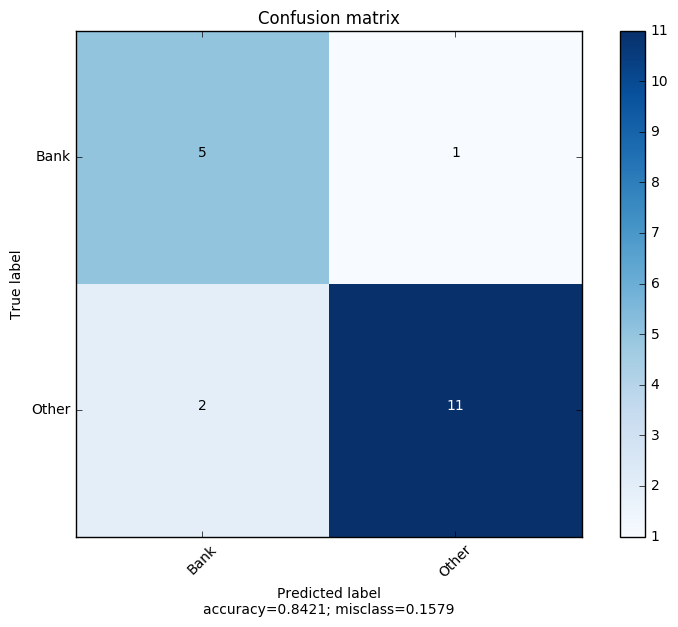

In [117]:
plot_confusion_matrix(cm,target_names = ['Bank','Other'])
plt.show()

In [173]:
modelknn.predict(X1_test)

array(['other'], dtype=object)